Ссылка на удалённый репозиторий GitHub: https://github.com/Tarakanishche/Forecasting-the-outflow-of-bank-customers.git


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-датафрейма-и-первичный-анализ-данных" data-toc-modified-id="Выгрузка-датафрейма-и-первичный-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выгрузка датафрейма и первичный анализ данных</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#SimpleImputer-✅" data-toc-modified-id="SimpleImputer-✅-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>SimpleImputer ✅</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Анализ-баланса-классов" data-toc-modified-id="Анализ-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ баланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Устранение-дисбаланса" data-toc-modified-id="Устранение-дисбаланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Устранение дисбаланса</a></span></li><li><span><a href="#Обучение-моделей-и-поиск-лучшей" data-toc-modified-id="Обучение-моделей-и-поиск-лучшей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей и поиск лучшей</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier-с-пересэмплированными-тренировочными-данными" data-toc-modified-id="RandomForestClassifier-с-пересэмплированными-тренировочными-данными-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>RandomForestClassifier с пересэмплированными тренировочными данными</a></span></li><li><span><a href="#RandomForestClassifier-со-взвешиванием-классов" data-toc-modified-id="RandomForestClassifier-со-взвешиванием-классов-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestClassifier со взвешиванием классов</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. 

Дополнительно будем измерять *AUC-ROC*, сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

---

## Подготовка данных

### Выгрузка датафрейма и первичный анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score, f1_score, roc_curve, roc_auc_score

import warnings

In [2]:
data = pd.read_csv('dataset.csv', index_col=0) #импортируем датафрейм и удалим столбец с индексами строк
data.reset_index(drop=True, inplace=True) #обновим индексы
data = data.drop(['CustomerId', 'Surname'], axis=1) #удалим ненужные для обучения столбцы
display(data.info(), data.head(10), data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


None

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


(10000, 11)

----

### Преобразование типов данных 

В столбцах `Geography`, `Gender` содержаться категориальные значения, а в `HasCrCard`, `IsActiveMember`, `Exited` - булев тип данных. Преобразуем вышеупомянутые столбы.

In [3]:
#преобразуем типы данных
data = data.astype({ 
    'Geography' : 'category', 'Gender' : 'category', 
    'HasCrCard' : 'bool', 'IsActiveMember' : 'bool', 'Exited' : 'bool'
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           9091 non-null   float64 
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  bool    
 8   IsActiveMember   10000 non-null  bool    
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  bool    
dtypes: bool(3), category(2), float64(3), int64(3)
memory usage: 518.0 KB


---

### Обработка пропусков

In [4]:
columns_to_encode = ['Gender', 'Geography'] #колонки, которые кодируем

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(data[columns_to_encode])

encoded_feature_names = encoder.get_feature_names(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

data.drop(columns_to_encode, axis=1, inplace=True) #удалим наши колонки, над которыми делали преобразования
data = pd.concat([data, encoded_df], axis=1)

display(data.head(10))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,True,True,101348.88,True,0.0,0.0,0.0
1,608,41,1.0,83807.86,1,False,True,112542.58,False,0.0,0.0,1.0
2,502,42,8.0,159660.80,3,True,False,113931.57,True,0.0,0.0,0.0
3,699,39,1.0,0.00,2,False,False,93826.63,False,0.0,0.0,0.0
4,850,43,2.0,125510.82,1,True,True,79084.10,False,0.0,0.0,1.0
5,645,44,8.0,113755.78,2,True,False,149756.71,True,1.0,0.0,1.0
6,822,50,7.0,0.00,2,True,True,10062.80,False,1.0,0.0,0.0
7,376,29,4.0,115046.74,4,True,False,119346.88,True,0.0,1.0,0.0
8,501,44,4.0,142051.07,2,False,True,74940.50,False,1.0,0.0,0.0
9,684,27,2.0,134603.88,1,True,True,71725.73,False,1.0,0.0,0.0


---

#### SimpleImputer ✅

- В столбце `Tenure` имеются пропуски можно заполнить их медианными значениями, дабы избежать влияния выбросов по годам и получения целочисленного значения.

In [5]:
simple_imputer = SimpleImputer(strategy='median')
data['Tenure'] = simple_imputer.fit_transform(data[['Tenure']])

display(data.isna().sum()) #проверим заполнились ли пропуски
display(data.Tenure.unique()) #посмотрим на значения колонки

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [6]:
data = data.astype({
    'Tenure' : 'int', 'Gender_Male' : 'int', 'Geography_Germany' : 'int', 'Geography_Spain' : 'int'
}) #так как все значения целочисленные, выполним преобразование типа колонки

display(data.dtypes) #проверим корректность внесенных изменений
display(data.Tenure.unique(), data.Tenure.value_counts())

CreditScore            int64
Age                    int64
Tenure                 int32
Balance              float64
NumOfProducts          int64
HasCrCard               bool
IsActiveMember          bool
EstimatedSalary      float64
Exited                  bool
Gender_Male            int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

5     1836
1      952
2      950
8      933
3      928
7      925
4      885
9      882
6      881
10     446
0      382
Name: Tenure, dtype: int64

---

## Исследование задачи

### Анализ баланса классов

In [7]:
data.Exited.value_counts() #посмотрим как распределены классы в целевом признаке

False    7963
True     2037
Name: Exited, dtype: int64

- Очевидно, что в классах присутствует дисбаланс, учитывая небольшие размеры выборки, мы можем применить `upsampling` или взвешивание классов. 
- В случае, `upsampling` меньший класс "продублируем" 4 раза, так как именно такая разница в количестве у двух категорий. 
- Этим займемся в следующем разделе.

---

## Борьба с дисбалансом

In [8]:
warnings.filterwarnings("ignore")

target = data['Exited']
features = data.drop('Exited', axis=1)

#поделим данные на две группы (в пропорции 3 к 2): train и (validation and test)
X_train, X_val_test, y_train, y_val_test = train_test_split(
    features, target, random_state=12345, test_size=0.4, stratify=target #используем параметр stratify, 
)                                                                        #чтобы категории были равномерно распределены

#разделим последнюю группу на валидационную и тестовую (в пропорции 1:1)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, random_state=12345, test_size=0.5, stratify=y_val_test #используем параметр stratify, 
                                                                                   #чтобы категории были равномерно распределены
)

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_val[numeric] = scaler.transform(X_val[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [9]:
def auc_roc(model, X, y): #напишем функцию для расчета AUC_ROC метрики
    probabilities_valid = model.predict_proba(X)
    probabilities_one_valid = probabilities_valid[:, 1]

    auc_roc = roc_auc_score(y, probabilities_one_valid)
    print(f'AUC_ROC нашей модели: {auc_roc:.2f}')

In [10]:
def roc(model, X, y): #напишем функцию для построения ROC-кривой
    probabilities_valid = model.predict_proba(X)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y, probabilities_one_valid)

    plt.figure()

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title("ROC-кривая")
    plt.show()

---

### Устранение дисбаланса

In [11]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [12]:
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 4)

---

### Обучение моделей и поиск лучшей

#### RandomForestClassifier с пересэмплированными тренировочными данными

*Небольшое замечание*: мы не рассматриваем дерево решений по той причине, что объем данных, с которыми нам необходимо работать, не очень большой, поэтому лучше всего будет сразу применять `RandomForestClassifier` для получения наиболее лучшей модели.

In [13]:
best_model = None
best_depth = 1
best_n_estimators = 10
best_f1_score = 0

for depth in range(1, 20, 1):
    for n_est in range(10, 60, 10):
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_est, random_state=12345)
        model.fit(X_train_upsampled, y_train_upsampled)
        
        predictions = model.predict(X_val)
        f1_score_val = f1_score(y_val, predictions)
        
        if f1_score_val > best_f1_score:
            best_model = model
            best_f1_score = f1_score_val
            best_depth = depth
            best_n_estimators = n_est

print(best_f1_score, best_depth, best_n_estimators)

0.6531483457844184 9 50


In [14]:
print(f'F1_score RandomForestClassifier с учетом дисбаланса классов: {best_f1_score:.2f}')
auc_roc(best_model, X_val, y_val)

F1_score RandomForestClassifier с учетом дисбаланса классов: 0.65
AUC_ROC нашей модели: 0.87


#### RandomForestClassifier со взвешиванием классов

In [16]:
best_model_weight = None
best_depth = 1
best_n_estimators = 10
best_f1_score_weight = 0


for depth in range(1, 20, 1):
    for n_est in range(10, 60, 10):
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_est, random_state=12345, class_weight='balanced')
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_val)
        f1_score_val = f1_score(y_val, predictions)
        
        if f1_score_val > best_f1_score_weight:
            best_model_weight = model
            best_f1_score_weight = f1_score_val
            best_depth = depth
            best_n_estimators = n_est

print(best_f1_score_weight, best_depth, best_n_estimators)

0.6458333333333334 9 40


In [17]:
print(f'F1_score леса решений со взвешиванием классов: {best_f1_score_weight:.2f}')
auc_roc(best_model_weight, X_val, y_val)

F1_score леса решений со взвешиванием классов: 0.65
AUC_ROC нашей модели: 0.87


В случае с лесом деревьев решений взвешивание классов не дало значимого преимущества, а даже наоборот, качество модели упало (F1_score), но на значение меньше, чем 0.01 


## Тестирование модели

Тестовая выборка:


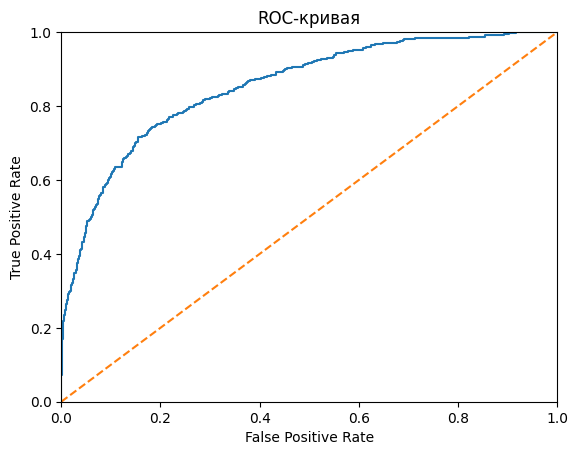

In [18]:
#построим ROC-кривую для нашей модели на тестовой выборке
print('Тестовая выборка:')
roc(best_model, X_test, y_test)

---

In [19]:
predictions = best_model.predict(X_test)
f1_score_test = f1_score(y_test, predictions)

print(f'F1_score на тестовой выборке: {f1_score_test:.2f}')
auc_roc(best_model, X_test, y_test)

F1_score на тестовой выборке: 0.61
AUC_ROC нашей модели: 0.85


Результаты интересующих нас метрик (F1_score и AUC_ROC), полученных на тестовой выборке, отличаются всего на пару десятых единиц, что не критично, так как сами значения являются полностью адекватными и обозначают, что модель, которую мы обучили, является рабочей.

----

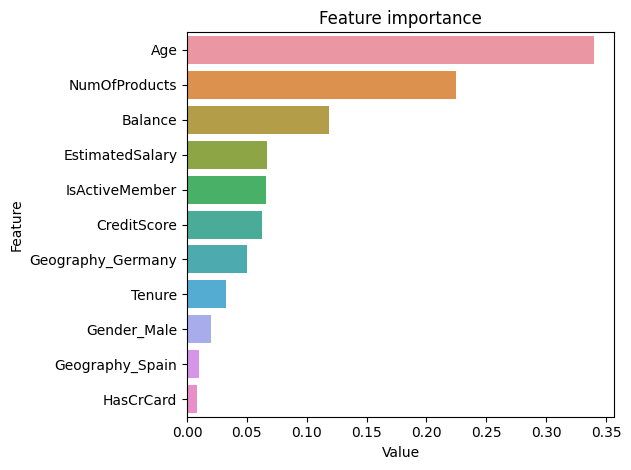

In [20]:
import seaborn as sns

feature_importance = best_model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, features.columns)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance')
plt.tight_layout()
plt.show();

<b>Вывод по важности метрик:</b> как можно заметить наибольший вклад вносят возраст; количество продуктов банка, используемых клиентом; баланс на счёте.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*